<a href="https://colab.research.google.com/github/AnjaliDeepunarayanan/AnjaliS/blob/main/AnjaliS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import Augmentor
# Passing the path of the image directory
p = Augmentor.Pipeline("/content/drive/MyDrive/v_dat/v_train/anjali")
  
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(100)

Initialised with 20 image(s) found.
Output directory set to /content/drive/MyDrive/v_dat/v_train/anjali/output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7F7317F272D0>: 100%|██████████| 100/100 [00:26<00:00,  3.82 Samples/s]


In [5]:
p = Augmentor.Pipeline("/content/drive/MyDrive/v_dat/v_train/manjusree")
  
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(100)

Initialised with 20 image(s) found.
Output directory set to /content/drive/MyDrive/v_dat/v_train/manjusree/output.

Processing <PIL.Image.Image image mode=RGB size=1122x1600 at 0x7F73166C62D0>: 100%|██████████| 100/100 [00:11<00:00,  8.94 Samples/s]


In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
train_dir="/content/drive/MyDrive/v_dat/v_train"
val_dir="/content/drive/MyDrive/v_dat/v_test"

In [8]:
train_data=train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary', batch_size=1,seed=42)
valid_data=valid_datagen.flow_from_directory(val_dir, target_size=(224, 224), class_mode='binary',batch_size=1,seed=42)

Found 240 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [9]:
model_1=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1,activation="sigmoid")
                                    
                                    
                                    
])

In [10]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [12]:
history_1=model_1.fit(train_data,
                      epochs=50,
                      steps_per_epoch=50,
                      validation_data=valid_data,
                       callbacks=[callback]
                      )

Epoch 1/50
50/50 [==============================] - 10s 174ms/step - loss: 0.6962 - accuracy: 0.5400 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/50
50/50 [==============================] - 6s 112ms/step - loss: 0.6970 - accuracy: 0.4000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 3/50
50/50 [==============================] - 5s 107ms/step - loss: 0.6767 - accuracy: 0.6600 - val_loss: 0.7719 - val_accuracy: 0.5000
Epoch 4/50
50/50 [==============================] - 6s 112ms/step - loss: 0.7154 - accuracy: 0.4400 - val_loss: 0.6909 - val_accuracy: 0.6500
Epoch 5/50
50/50 [==============================] - 6s 113ms/step - loss: 0.6954 - accuracy: 0.6400 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 6/50
50/50 [==============================] - 6s 112ms/step - loss: 0.6877 - accuracy: 0.5800 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 7/50
50/50 [==============================] - 7s 138ms/step - loss: 0.6905 - accuracy: 0.4800 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch

In [16]:
from tensorflow.keras.preprocessing import image
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model_1.predict(X)
  
  print(val)
  print(val[[0]])
  if val>=0.5:
    plt.xlabel("manjusree",fontsize=30)
  elif val<0.5:
    plt.xlabel("anjali",fontsize=30)

[[1.]]
[[1.]]


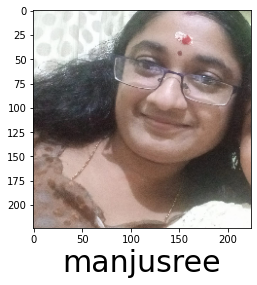

In [17]:
predictImage("/content/drive/MyDrive/v_dat/v_test/manjusree/IMG-20220715-WA0046.jpg")

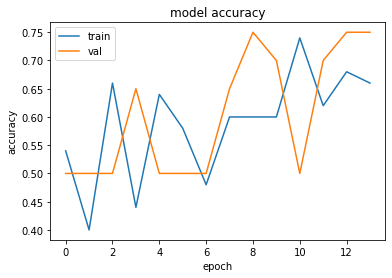

In [18]:
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

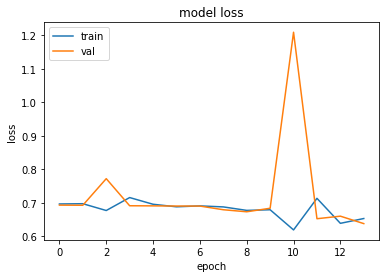

In [19]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
model_2=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1,activation="sigmoid")])

In [21]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [22]:
history_2=model_2.fit(train_data,
                      epochs=50,
                      steps_per_epoch=50,
                      validation_data=valid_data,
                       callbacks=[callback]
                      )

Epoch 1/50
50/50 [==============================] - 6s 117ms/step - loss: 0.7274 - accuracy: 0.5400 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 2/50
50/50 [==============================] - 5s 100ms/step - loss: 0.7019 - accuracy: 0.5400 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 3/50
50/50 [==============================] - 5s 96ms/step - loss: 0.6802 - accuracy: 0.5200 - val_loss: 0.6779 - val_accuracy: 0.6500
Epoch 4/50
50/50 [==============================] - 5s 107ms/step - loss: 0.6889 - accuracy: 0.5800 - val_loss: 0.6859 - val_accuracy: 0.6500
Epoch 5/50
50/50 [==============================] - 7s 144ms/step - loss: 0.6641 - accuracy: 0.6600 - val_loss: 0.6632 - val_accuracy: 0.6000
Epoch 6/50
50/50 [==============================] - 8s 168ms/step - loss: 0.6380 - accuracy: 0.6000 - val_loss: 0.6898 - val_accuracy: 0.7000
Epoch 7/50
50/50 [==============================] - 5s 102ms/step - loss: 0.6377 - accuracy: 0.6400 - val_loss: 0.6374 - val_accuracy: 0.5500
Epoch 8

In [24]:
from tensorflow.keras.preprocessing import image
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model_2.predict(X)
  
  print(val)
  #print(val[[0]])
  if val>=0.5:
    plt.xlabel("manjusree",fontsize=30)
  elif val<0.5:
    plt.xlabel("anjali",fontsize=30)

[[0.]]


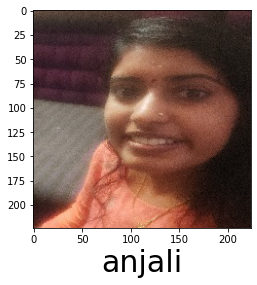

In [26]:
predictImage("/content/drive/MyDrive/v_dat/v_test/anjali/IMG-20220714-WA0032.jpeg")

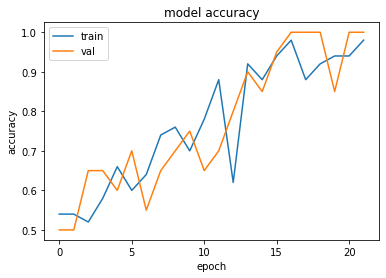

In [27]:
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


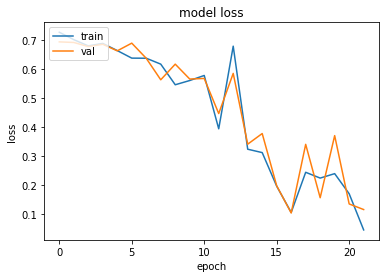

In [28]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()